# Visualizing Relationships in Space and Time

Visualizing data in space in time is more complex than other types of data that we've worked with so far, and often the two - space and time - are interconnected.

## How Spatial Data is Different:

**Geographical Reference:** Spatial data is always tied to some location on the Earth, whether it's a point (like a city's location), a line (like a river or road), or a polygon (like the boundaries of a country).

**Multiple Dimensions:** In addition to traditional data dimensions (like time or categorical attributes), spatial data has at least two or three spatial dimensions (latitude, longitude, and possibly altitude).

**Complex Relationships:** Spatial data often has involves more sophisticated concepts like adjacency (which regions are next to each other), containment (a city contained within a state), and connectivity (how two places are connected by roads).

**Varied Scales:** Spatial data can be represented and analyzed at multiple scales, from the global scale down to street level.


## How Time Data is Different:

**Temporal Order Matters**: Unlike many other types of data, the order of observations in a time series is crucial. This means that the x-axis (typically representing time) is not just a category but a continuous or discrete progression.

**Trends, Seasonality, and Autocorrelation**: Time series data can show long-term trends, seasonal patterns, and cycles. Identifying these components visually is crucial for many analyses.  Additionally, observations in time series data often depend on previous observations, which is called autocorrelation.

**Noise**: Time series data can be "noisy", meaning it can seem to fluctuate up and down much more than other types of data.

**Annotations**: Significant external events can impact time series data. For instance, an unexpected event might cause a sudden spike or drop in sales data. Annotating these can provide context to those viewing the visualization.


## Examples: 

### Visualizing neighborhoods in New York City
https://www.nytimes.com/interactive/2023/upshot/extremely-detailed-nyc-neighborhood-map.html?unlocked_article_code=1.QE0.1RIX.nHt7o8GXvdIo&bgrp=t&smid=url-share

### Air safety data
https://www.nytimes.com/interactive/2023/08/21/business/airline-safety-close-calls.html?unlocked_article_code=1.QE0.uSpQ.Fxy2EAugRln-&bgrp=t&smid=url-share

### Shipping oil from India
https://www.nytimes.com/interactive/2023/06/22/business/india-russia-oil.html?unlocked_article_code=1.QE0.GiSc.GL1fCETP9Khf&bgrp=t&smid=url-share

### Visualizing Birthplace by Current Residence in the US
https://www.nytimes.com/2014/08/16/upshot/mapping-migration-in-the-united-states-since-1900.html?unlocked_article_code=1.QE0.MfTP.j77BjqRAeAnb&bgrp=t&smid=url-share

### The Baby Name Voyager
https://web.archive.org/web/20211108150814/https://www.babynamewizard.com/voyager#prefix=&sw=both&exact=false

### The US Dialect Quiz
https://www.nytimes.com/interactive/2014/upshot/dialect-quiz-map.html?unlocked_article_code=1.SE0.ST6F.vKsEZKvboSFr&bgrp=t&smid=url-share

### Visualizing Sound in Notre Dame
https://www.nytimes.com/interactive/2023/03/03/magazine/notre-dame-cathedral-acoustics-sound.html?unlocked_article_code=1.SE0.J0oL.nQeyxOvnFU7T&bgrp=t&smid=url-share

### Starlink Satellites
https://www.nytimes.com/interactive/2023/07/28/business/starlink.html?unlocked_article_code=1.SE0.bw4G.I_vEYOq_N6ap&bgrp=t&smid=url-share

## Plotly Express

We are going to use another Python library called Plotly Express to create interactive visualizations of spatial and time-series data.

**Origin:** Plotly Express (often abbreviated as px) is a part of the Plotly ecosystem. Plotly itself began as a startup in 2012, co-founded by Alex Johnson, Jack Parmer, Chris Parmer, and Matt Sundquist. It started as a platform to create interactive, web-based visualizations using Python, R, and Julia.

**Purpose:** Plotly Express was introduced later to simplify the process of creating visualizations with Plotly. While the original Plotly API is quite flexible, it can be verbose for creating common visualizations. Plotly Express offers a more concise syntax, which makes it easier to produce standard visualizations with less code.

**Evolution:** Over time, Plotly Express has been integrated more tightly with the broader Plotly library. It acts as a high-level interface, while the main Plotly library can be used for more detailed customization of plots.


## Daily high prices for Cryptocurrency 2018 - 2023

C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



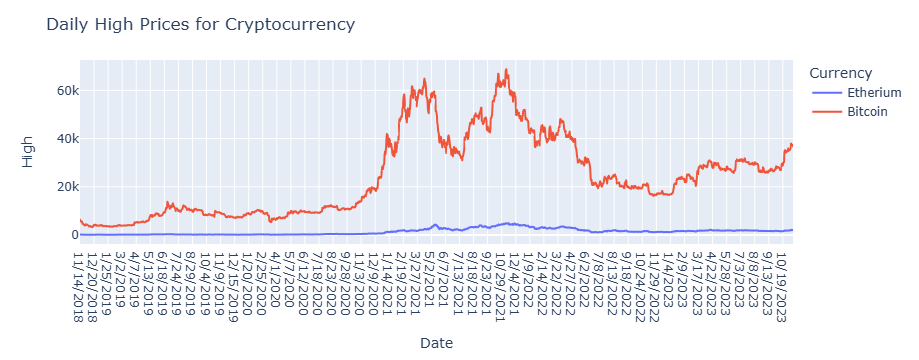

In [6]:
import pandas as pd
import plotly.express as px

crypto_df = pd.read_csv('assets/ETH-BTC-USD.csv')

fig = px.line(crypto_df, x='Date', y='High', color='Currency', hover_data=['High', 'Low', 'Open', 'Close'], hover_name='Currency')

fig.update_layout(title='Daily High Prices for Cryptocurrency')

fig.show()


## Monthly US Candy Production 1972 - 2016

In [7]:
candy_df = pd.read_csv('assets/candy_production.csv')

candy_df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


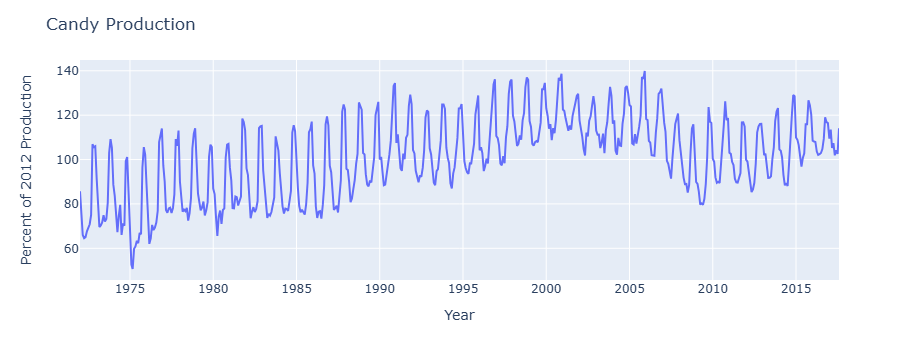

In [10]:
fig = px.line(candy_df, 
              x='observation_date', 
              y='IPG3113N',
              labels={'IPG3113N': 'Percent of 2012 Production', 'observation_date': 'Year'})

fig.update_layout(title='Candy Production')

fig.show()

## Incorporating Elements of Space and Time in a Scatterplot

In [11]:
df = px.data.gapminder()

df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


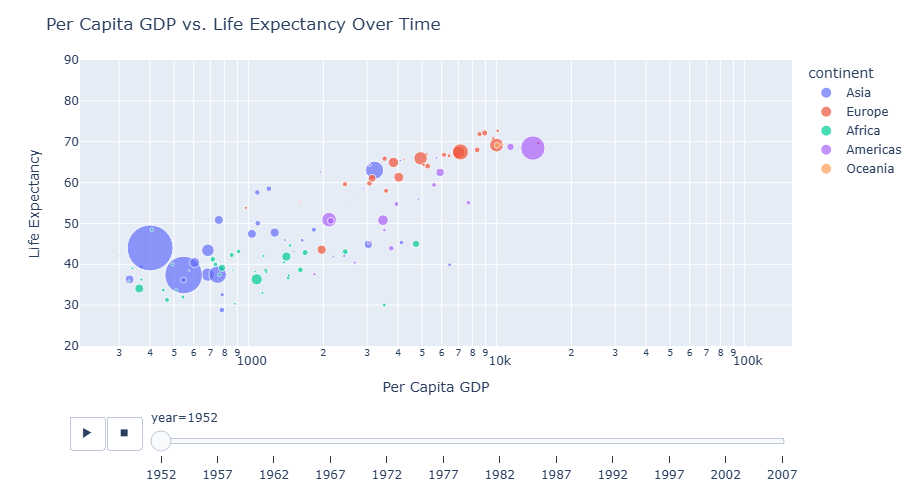

In [12]:
fig = px.scatter(df,
                 x='gdpPercap',
                 y='lifeExp',
                 log_x=True,
                 color='continent',
                 size='pop',
                 hover_name='country',
                 animation_frame='year',
                 size_max=50,
                 labels={'gdpPercap': 'Per Capita GDP', 'lifeExp': 'Life Expectancy'})

fig.update_layout(yaxis_range=[20, 90],
                  height=500,
                  title = 'Per Capita GDP vs. Life Expectancy Over Time')

fig.show()

It's amazing how much information this plot can communicate.  

* How does life expectancy change during this time period?
* How does GDP change?
* How do these factors change for different regions of the world?
* How does the size of a country impact these relationships?


## Working with Plotly Express

Let's take apart our Plotly Expess figure of the Gapminder data and build it up from the beginning, exploring how each feature works.

We'll begin be importing `plotly.express as px` and loading the data - which comes as part of the plotly express package - into a DataFrame.

Then we'll use Plotly to make a simple scatterplot of per capita GDP and Life expectancy.

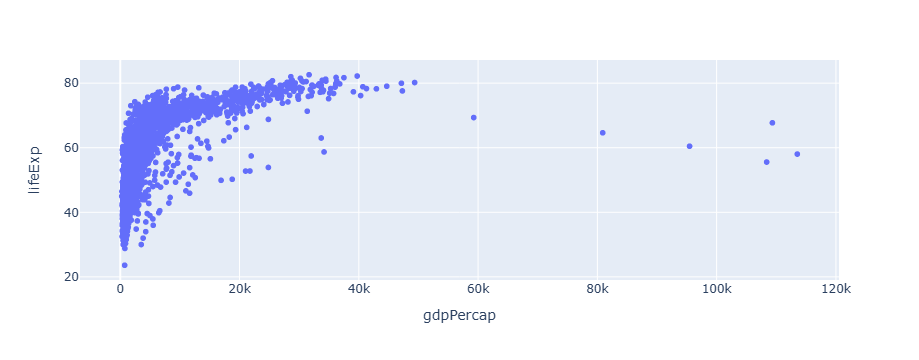

In [13]:
fig = px.scatter(df,
                 x='gdpPercap',
                 y='lifeExp')

fig.show()

That looks very different from where we will end up!  First things first, we've got a curved relationship between per capita GDP and life expectancy.  We learned in the last lesson that a linear model doesn't do a good job modeling the relationship between two features where the scatterplot has a curved pattern.  

However, there are ways to "straighten" the relationship through feature engineering.  You aren't expected to know this, but a plot like this, where the points travel steeply up the y-axis and then flatten out, is characteristic of a logarithmic rather than linear relationship.

That means that if we use a log scale for our x-axis, our points will fall into a line rather than a curve.

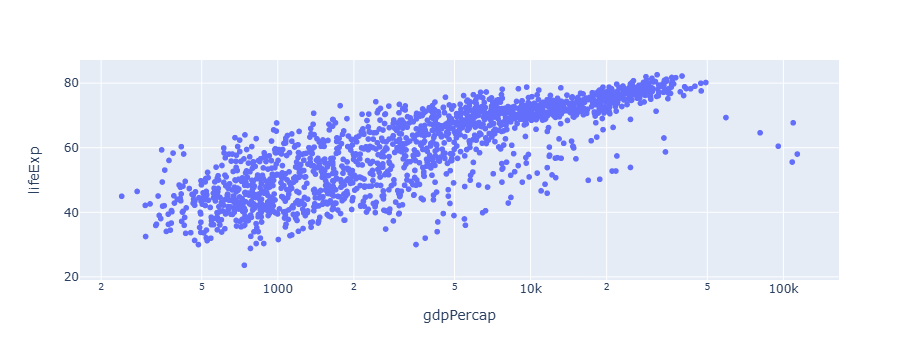

In [14]:
fig = px.scatter(df,
                 x='gdpPercap',
                 y='lifeExp',
                 log_x=True)

fig.show()

That's much more like a straight line.

Now let's differentiate the countries by size and continent.  It makes intuitive sense to make bigger countries bigger and smaller countries smaller (ordinal data) and to use color to indicate the continent they belong to (nominal data).

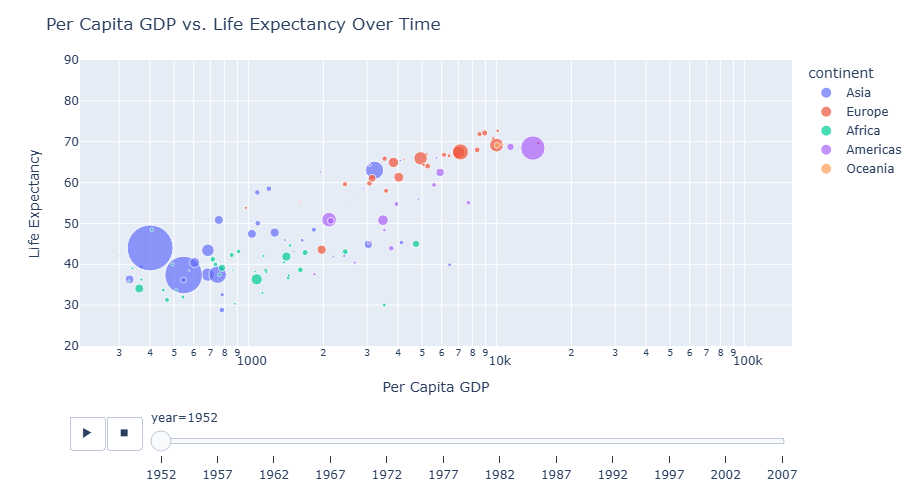

In [22]:
fig = px.scatter(df,
                 x='gdpPercap',
                 y='lifeExp',
                 log_x=True,
                 color='continent',
                 size='pop',
                 hover_name='country',
                 animation_frame='year',
                 size_max=50,
                 labels={'gdpPercap': 'Per Capita GDP', 'lifeExp': 'Life Expectancy'})

fig.update_layout(yaxis_range=[20, 90],
                  height=500,
                  title = 'Per Capita GDP vs. Life Expectancy Over Time')

fig.show()

Move your cursor over the map.  A tooltip appears and tells you the per capita GDP, the life expectancy, the country size and the continent.  

However, it's missing an important piece of information - the actual name of the country!  Let's add that now.

If you hover over the large purple dots, you'll see something strange... China appears in the data multiple times.  This is because there's a large purple dot plotted for every year that data was recorded for China.  It's confusing to have them all plotted on the same plot at the same time, so let's add in the animation that shows different values of GDP and life expectancy at different times.

We're close to having explored all the features from our first graph, however, there are some basic issues we need to fix.  First, we could do a better job giving our figure a title and descriptive names to our x-axis and y-axis.  Second, We can change the size of the circles on our plot so they overlap less.  Third, our y-axis isn't sufficiently tall to show the entire range of life expectancy.  We need to modify our code to change these features.

## Plotting spatial data on a map

Let's look at a synthetic dataset of car share stations in Montreal.

The dataset contains the columns `peak_hour`, `car_hours`, `Latitude`, and `Longitude`. These columns represent whether it's peak hour at the car-sharing station, the total hours the cars have been used, and the latitude and longitude of the station respectively.

In [23]:
car_df = px.data.carshare()

car_df.head()

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20
3,45.522870,-73.595677,560.166667,23
4,45.453971,-73.738946,2836.666667,19


We can plot each car charging station using its latitude and longitude and change the size and color depending on how many hours the cars have been used.  Finally, we can gain more inisght into the use patterns of the charging stations by animating by peak hour from midnight to 11pm the next night.

C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



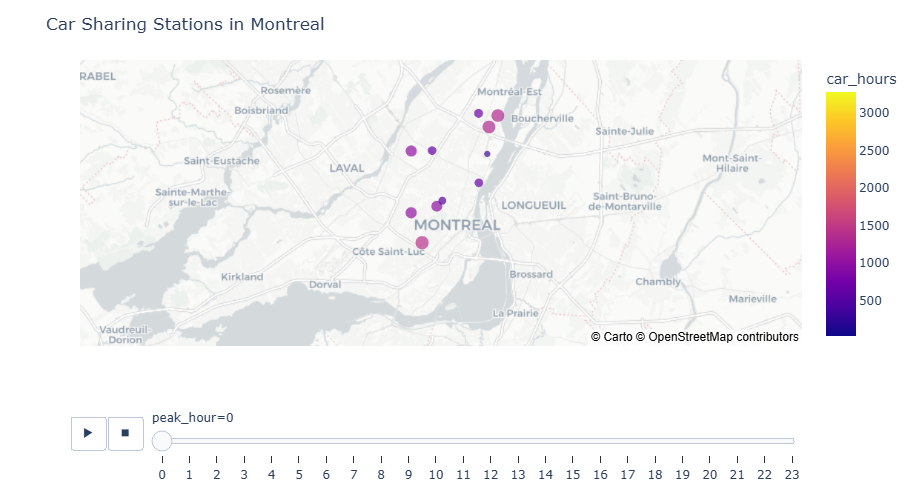

In [29]:
car_df = car_df.sort_values(by='peak_hour')

min_usage = car_df['car_hours'].min()
max_usage = car_df['car_hours'].max()

fig = px.scatter_mapbox(car_df,
                        lat='centroid_lat',
                        lon='centroid_lon',
                        mapbox_style='carto-positron',
                        size='car_hours',
                        color='car_hours',
                        size_max=15, 
                        zoom=9,
                        animation_frame='peak_hour',
                        range_color=[min_usage, max_usage])

fig.update_layout(height=500,
                  title='Car Sharing Stations in Montreal')

fig.show()

In [ ]:
fig = px.scatter_mapbox(df_carshare, 
                        lat="centroid_lat", 
                        lon="centroid_lon",
                        size="car_hours",
                        animation_frame="peak_hour",
                        color='car_hours', 
                        size_max=15, 
                        zoom=10, 
                        mapbox_style="carto-positron",  # You can change the map style
                        title="Car Sharing Stations and Usage")

fig.update_layout(height=500)  

# Display the plot
fig.show()

**What are some observations we can make about carshare use in Montreal?**

## Visualizing the Gapminder Data on a Map

Earlier we visualized the Gapminder data with an interactive scatterplot.  This was a great way to see how factors like country size, GDP, and life expectancy have changed over time in different countries.  However, wouldn't it be nice to see similar data plotted on a map?  Let's look at the Gapminder data one more time to remember the features included in it.

C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



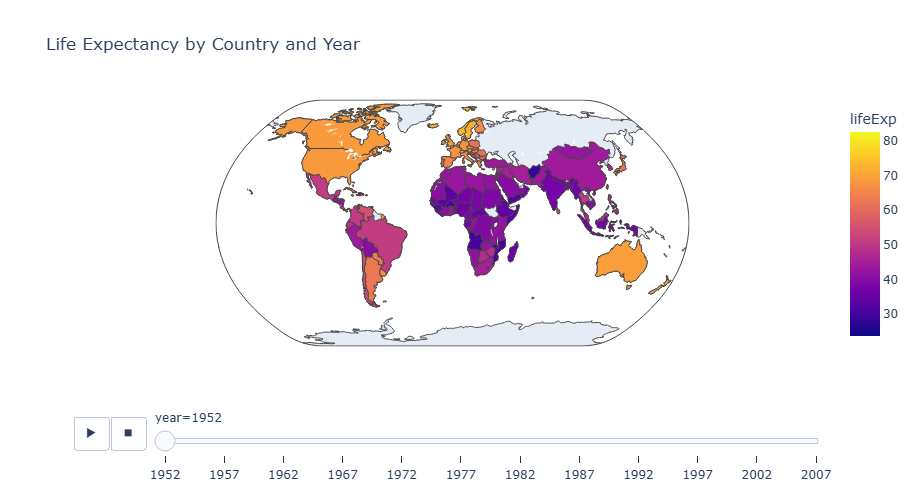

In [30]:
min_lifeExp = df['lifeExp'].min()
max_lifeExp = df['lifeExp'].max()

fig = px.choropleth(df, 
                    locations='iso_alpha',
                    color='lifeExp',
                    hover_name='country',
                    animation_frame='year',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection='natural earth',
                    title="Life Expectancy by Country and Year",
                    range_color=[min_lifeExp, max_lifeExp]) # Set fixed range for color scale

fig.update_layout(height=500)  

# Display the plot
fig.show()

This time we're going to make what's called a choropleth plot.  A choropleth plot (or choropleth map) is a visualization where areas are shaded or patterned in proportion to a feature of a geographic characteristic within each area, such as population density or per-capita income. The term "choropleth" comes from the Greek words "choro" (area/region) and "pleth" (a quantity).

Let's begin by making a simple choropleth plot of life expectancy in each country.

We can also add animation to show time like we did earlier with the `animation_frame` option.

**However, there is one big problem with the way this data is being displayed.  Can you spot it?**

## Things to think about...

**Start Simple:** One of the main advantages of Plotly Express is its ability to create complex visualizations with simple commands. Always start with a basic plot and then add complexity as needed.

**Use the Right Plot:** Choose the visualization type that best represents your data. For example, use bar charts for categorical data comparison, scatter plots for bivariate relationships, and line charts for time series.

**Interactive Features:** One of the primary benefits of Plotly Express is its interactive capabilities. Make use of features like hover tooltips, zooming, and panning to allow users to delve deeper into the data.

**Consistent Styling:** While Plotly Express offers a lot of customization, it's essential to keep the style consistent, especially if presenting multiple visualizations together. Consistent use of colors, legends, and axis labels can make plots more readable and professional-looking.

**Keep It Readable:** While it's tempting to add many features and details to a plot, clarity should always be the priority. Ensure axis labels are clear, legends are understandable, and the visualization doesn't feel cluttered.

**Scale and Projection Matter**:
    - Be cautious about the map projection you use. Different projections can distort land area, shapes, or distances. Choose one that is appropriate for your data and the message you're trying to convey.
    - If zoom functionality is available, use it judiciously. Ensure that zoom levels make sense for the data being displayed.

**Provide Context**: 
    - Use base maps that provide minimal context without overwhelming the main data. This could be just the outline of countries or major waterways.  It could also mean adding annotations to put a date or time in context.
    - Legends are crucial. Ensure they are clear and positioned well.
    
**Keep Ethical Considerations in Mind**:
    - Spatial and time data can sometimes be sensitive. Ensure that you're not revealing private or confidential information.
    - Be aware of cultural or political sensitivities, especially when dealing with boundaries or disputed territories.

**Stay Updated with Data Sources**: Geopolitical boundaries and place names can change. Ensure that the base map and spatial data you're using are up-to-date.


## OK
Now you've had the opportunity to work with Plotly Express to display relationships over space and time.  This is a powerful tool that's great for making data come alive to your audience.
